# Telecom Churn Prediction

## Problem Statement
For Telecom companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations. The key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 70% of the sample data. The remaining 30% are used to apply the test models and assess their predictive power with regards to “churn / not churn”.

## Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [9]:
# Read csv File with Pandas
df = pd.read_csv(r"C:\Users\mrsmi\Downloads\Projects\Telecom Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Exploration

In [10]:
# Check Shape of Data
df.shape

(7043, 21)

In [11]:
# Check the Basic Information of Data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Statistical Summary 
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


* Here we can see **75%** of peoples have **tenure less than 55 months**
* Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month and maximum Monthly Charges is 118.75 USD.


In [13]:
# Checking Data Types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
# Checking for Null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Uniques Values of Dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Exploratory Data Analysis (EDA)- Data Visualization

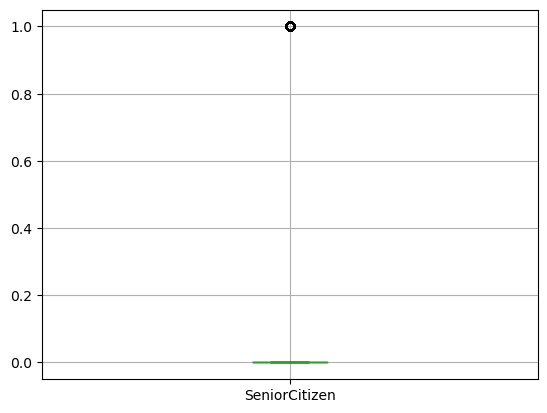

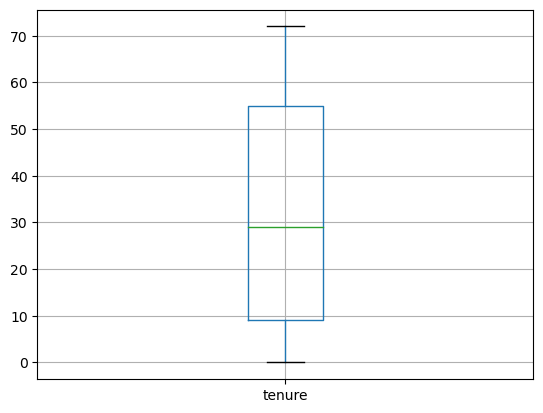

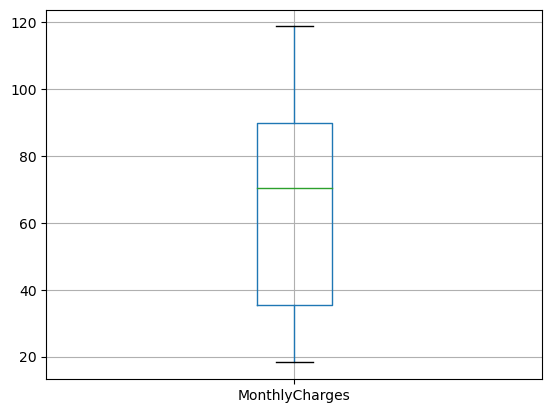

In [16]:
# Box plotting Only on 3 variables as it works on Numerical Variable.
box_df = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']]

import matplotlib.pyplot as plt
for column in box_df:
    plt.figure()
    box_df.boxplot(column)

<Figure size 6000x3600 with 0 Axes>

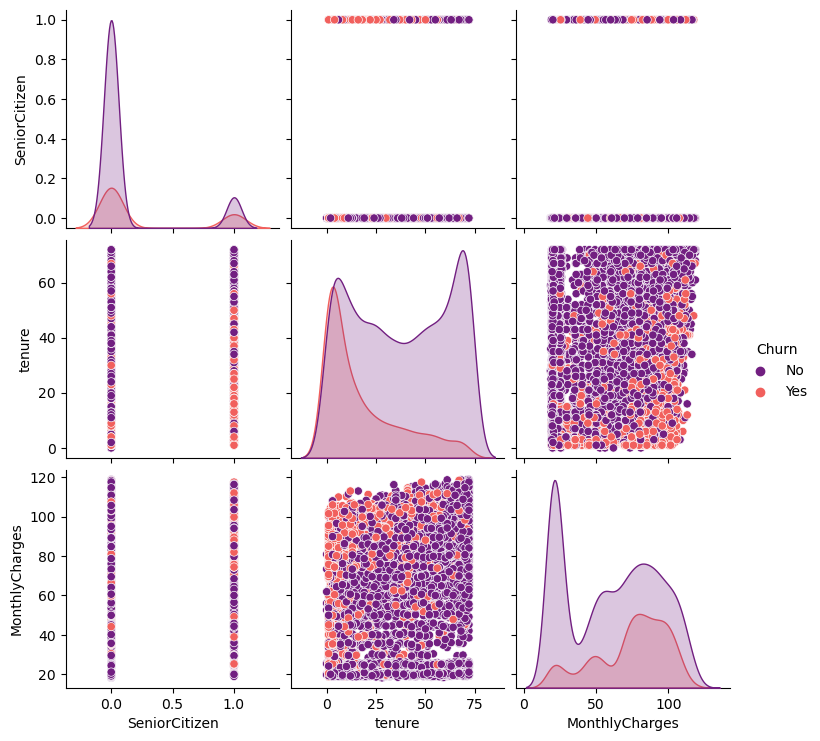

In [17]:
# Pair Plot
plt.figure(dpi=300, figsize=(20,12))
sns.pairplot(df,hue="Churn",palette="magma")

plt.show()

* Churn is high when Monthly Charges are high.
* Churn is high at starting tenure and churn is low as tenure increases.

No     5174
Yes    1869
Name: Churn, dtype: int64


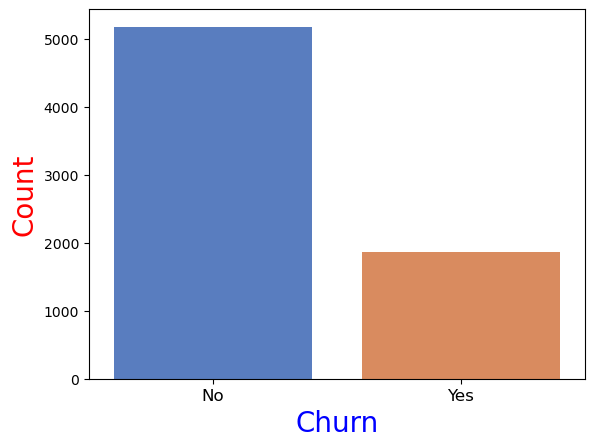

In [37]:
# Countplot of Churn 
print(df['Churn'].value_counts())

sns.countplot(x= "Churn", data= df, palette= "muted")

plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

Here we can see Churn data is imbalance. It shows No churn is high.

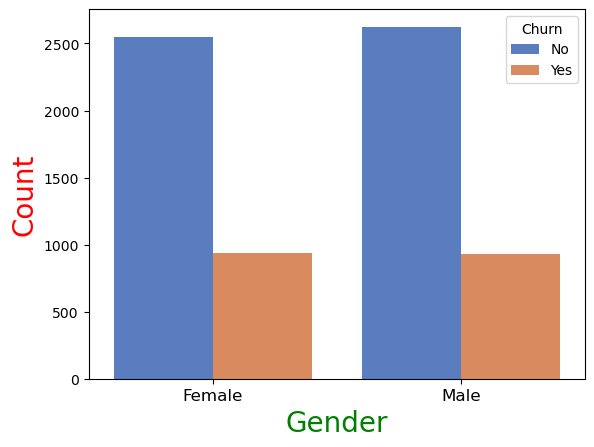

In [36]:
# Countplot of Churn with respect to Gender
sns.countplot(x= "gender", data= df, hue = "Churn", palette= "muted")


plt.xticks(fontsize = 12)
plt.xlabel("Gender", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

Churn in male and female is approximately same whereas in the No-churn male are more than female

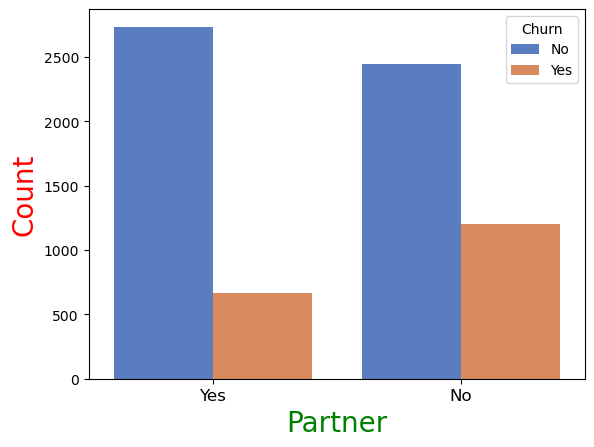

In [40]:
# Countplot With respect to Partner ( Partner means Whether the Customer has Partner or not)
sns.countplot(x="Partner",hue="Churn",palette="muted",data=df)

plt.xticks(fontsize = 12)
plt.xlabel("Partner", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

People have partners are less churn.


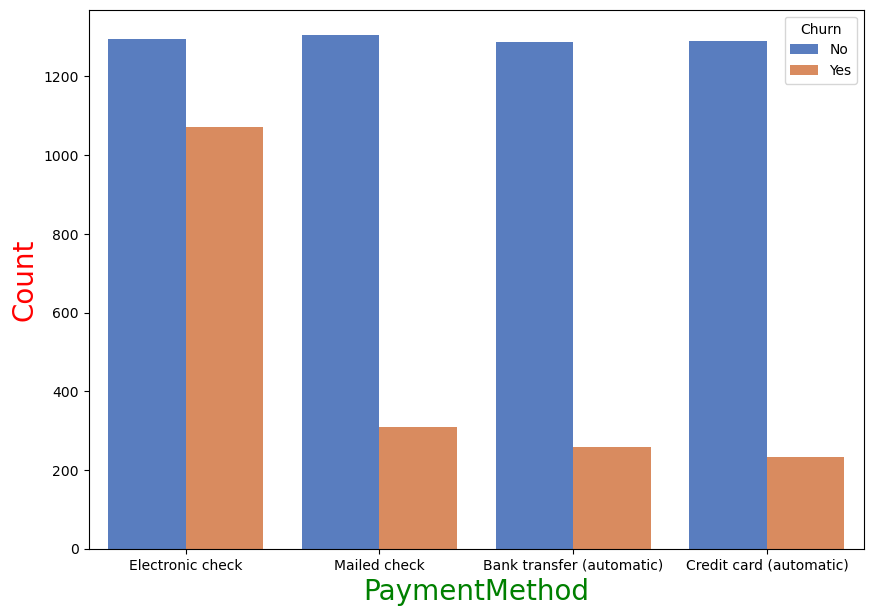

In [44]:
# Countplot with respect to PaymentMethod (Electronic Check,Mailed Check, Bank Transfer, Credit Card)
plt.figure(figsize= (10, 7))
sns.countplot(x="PaymentMethod",hue="Churn",palette="muted",data=df)

plt.xticks(fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

In Electronic check payment have high churn.

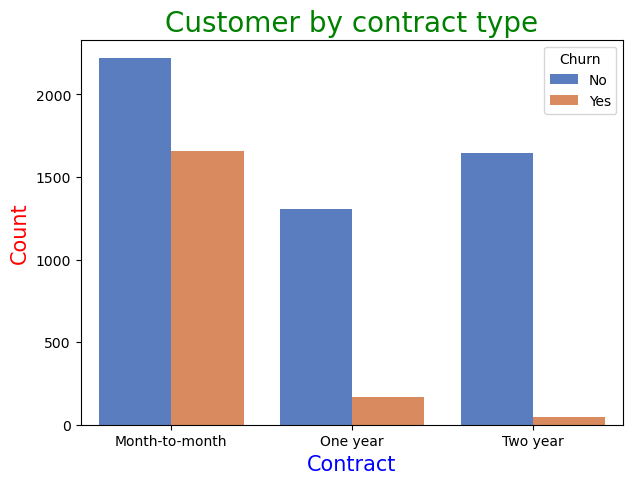

In [43]:
# Countplot With respect to Contract (monthly, yearly, 2 years)
plt.figure(figsize=(7,5))
sns.countplot(x= "Contract", data= df ,palette="muted", hue="Churn")

plt.xlabel("Contract", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Customer by contract type", fontsize = 20, c= "g")
plt.show()

Month to Month contract has high churn

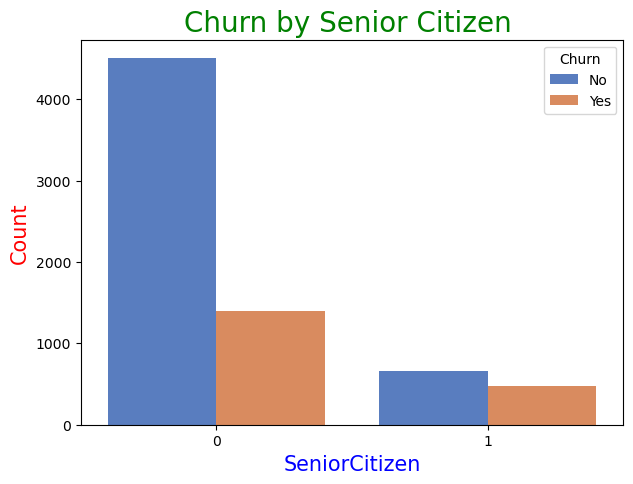

In [47]:
# Countplot With respect to Senior Citizen (Whether a Senior Citizen(1) or not(0))
plt.figure(figsize=(7,5))
sns.countplot(x= "SeniorCitizen", data= df ,palette="muted", hue="Churn")

plt.xlabel("SeniorCitizen", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Senior Citizen ", fontsize = 20, c= "g")
plt.show()

Here we can see Senior Citizen has low churn


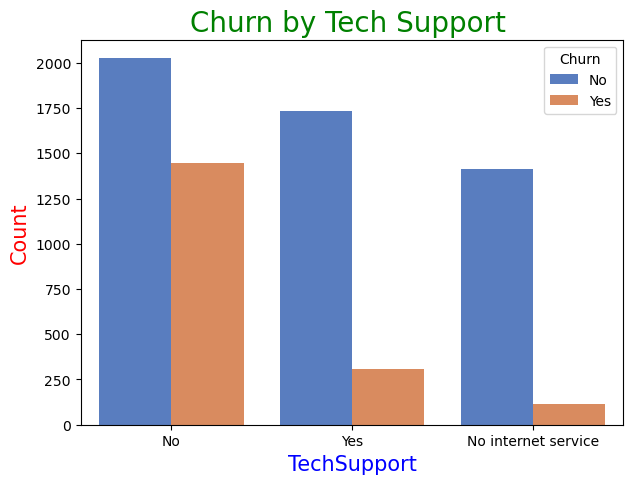

In [46]:
# Countplot with respect to Tech Support (Yes, No, No Internet Service)
plt.figure(figsize=(7,5))
sns.countplot(x= "TechSupport", data= df ,palette="muted", hue="Churn")

plt.xlabel("TechSupport", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Tech Support ", fontsize = 20, c= "g")
plt.show()

No Tech support category has high Churn and No Internet service has low churn


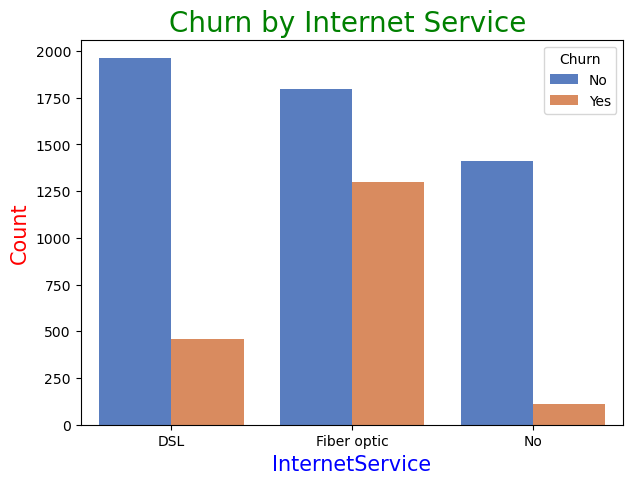

In [45]:
#Countplot with respect to Internet Service (DSL, Fiber Optic, No)
plt.figure(figsize=(7,5))
sns.countplot(x= "InternetService", data= df ,palette="muted", hue="Churn")

plt.xlabel("InternetService", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Internet Service ", fontsize = 20, c= "g")
plt.show()

Fiber Optic has high churn and No internet service has low churn


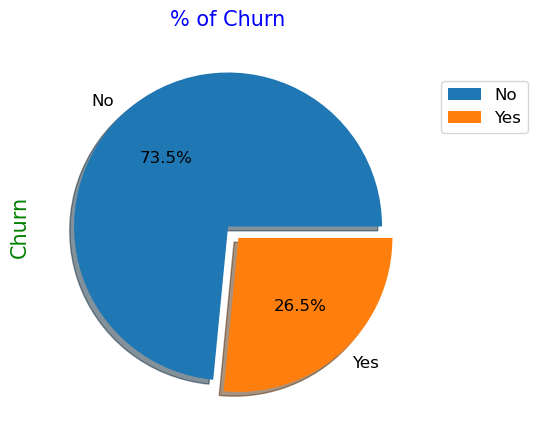

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
# Pie Chart With Percentage Seperation
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, explode = (0, 0.1), shadow=True )                                                                           

ax.set_ylabel('Churn',fontsize = 15, c = "g")
ax.set_title('% of Churn', fontsize = 15, c= "b")
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)
plt.show()

df.Churn.value_counts()

Here we can see Churn is 26.5% and No Churn is 73.5%. Data is imbalance.


## Data Cleaning


In [20]:
# From here data cleaning
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors="coerce")


# From the study of data found out that there are some blank values in "TotalCharges" so converting them.

In [21]:
#missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# Reading data With the Filter of Null Values in Variable 'TotalCharges' 
df.loc[df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In Total Charges columns 11 NaN values Present. We have to drop that values for model building.


In [23]:
# Drop NaN values 
df.dropna(axis =0, inplace=True)


In [24]:
# Rechecking the Null Values.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Lable Encoding


In [25]:
#Convert records Categorical values to numerical values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in df.columns:
    df[x]=le.fit_transform(df[x])

In [26]:
print(df.shape)

(7032, 21)


In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


## Correlation Analysis

In [28]:
# corr = round(df.corr())
corr=df.corr()

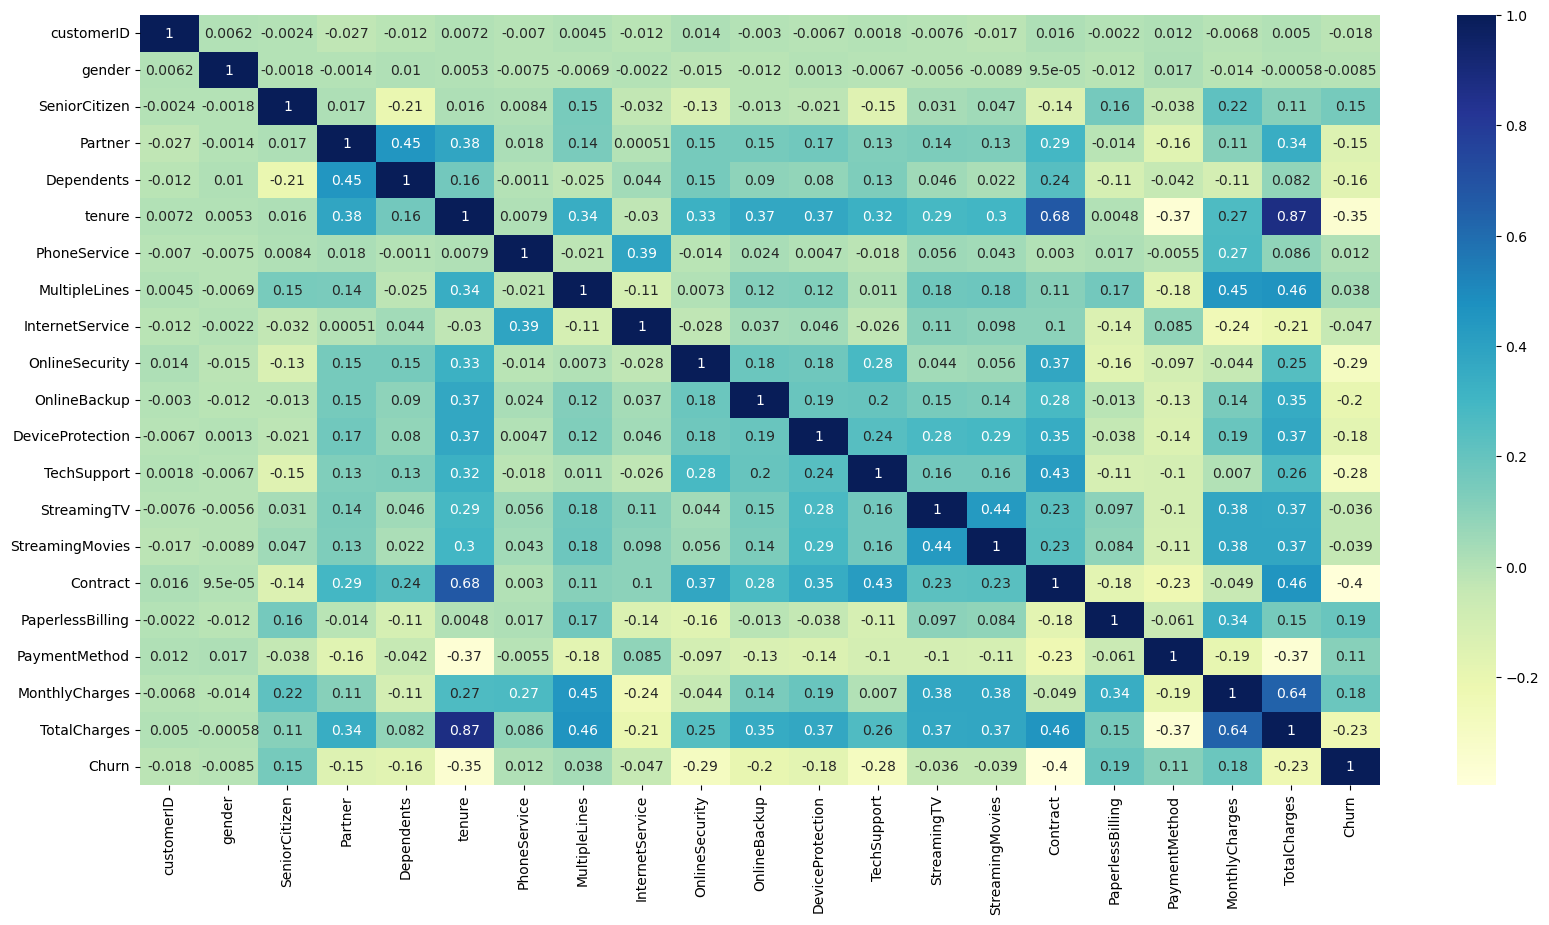

In [29]:
### Plotting heatmap for visualising the correlation between features
# sns.set(rc={'figure.figsize':(10,10)})
feature=corr.index
plt.figure(figsize=(20,10))
g=sns.heatmap(df[feature].corr(), annot=True, cmap="YlGnBu")

From the above heat map we can notice that "contract" VS "Tensure" are correlated with each other but it doesnt affect the
other variables so we decide not to drop it

## Creating X and Y

In [30]:
# Create X and Y
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

## Data Balancing

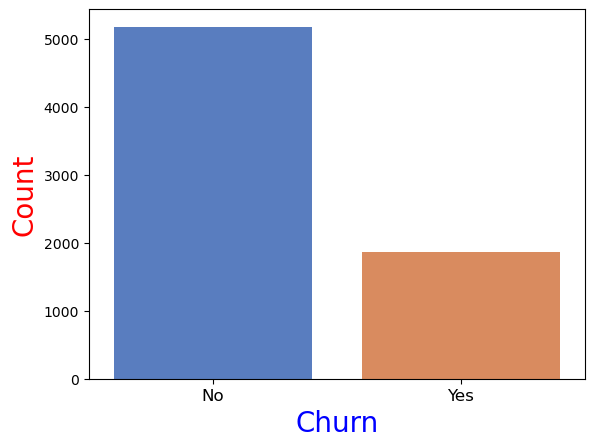

No     5174
Yes    1869
Name: Churn, dtype: int64

In [48]:
# Again Plotting the Count Plot to show Data Imbalancing 
sns.countplot(x= "Churn", data= df, palette= "muted")
plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

df["Churn"].value_counts()

* Here we can see Data is Imbalance

* Implement Random Over Sampler for Balancing data


In [32]:
# pip install -v scikit-learn

## Random Over Sampling

In [33]:
#  When one class having significantly more instances than the others.
# This can lead to biased model performance and inaccurate predictions, as the model tends to favor the majority class.

In [34]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state= 42)

X_res, y_res = os.fit_resample(X,y)

In [35]:
X_res.shape, y_res.shape

((10326, 20), (10326,))

In [36]:
# Check data is balance or not
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 5163, 1: 1869})
Resampled datset shapeCounter({0: 5163, 1: 5163})


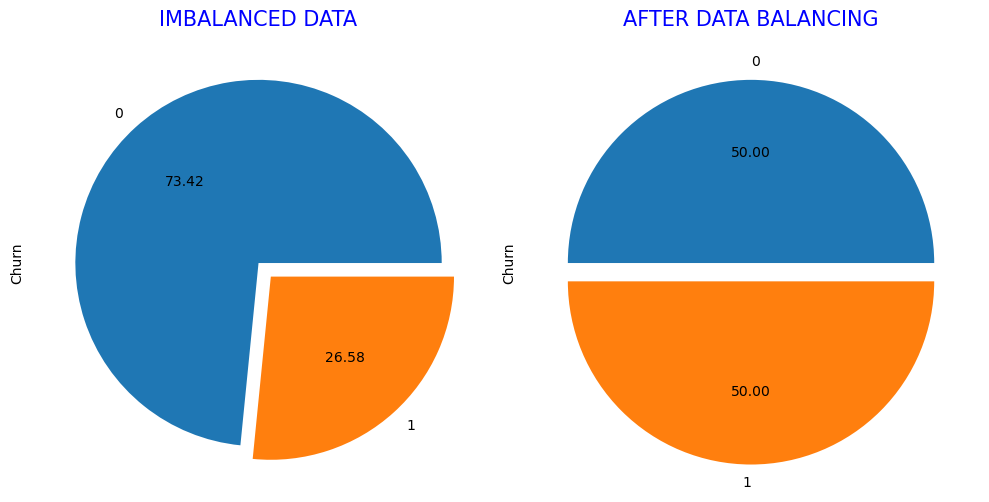

In [37]:
# Pieplotting difference when data was imbalanced and after balancing 
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA", fontsize = 15, c= "b")
df["Churn"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER DATA BALANCING", fontsize = 15, c= "b")
y_res.value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

## Model building after balancing the data


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res,test_size=0.3,random_state=1)


In [39]:
#Create a Function to print result in tabular format

def develop_prediction_report(Model,Y_test, Y_pred):

    from sklearn import metrics
    # create the result table for all accuracy scores
    
    # create a list of column names
    cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

    # creating an empty dataframe of the colums
    prediction_report = pd.DataFrame(columns = cols)

    # compiling the required information
    Bagging_Meta_estimator = pd.Series({'Model': Model,
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                  'f1-score':metrics.f1_score(Y_test, Y_pred)})



    # appending our result table
    prediction_table = prediction_report.append(Bagging_Meta_estimator , ignore_index = True)
    return prediction_table

## KNN 

In [40]:
#Predicting using the KNNeighbours_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric="manhattan") 

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 0 0]


Accuracy of the Training model:  0.7364416159380188
Accuracy of the Testing model:  0.7259522272433828
[[1168  406]
 [ 443 1081]]


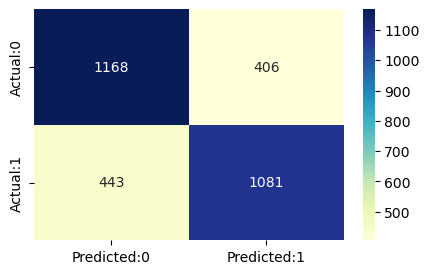

Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1574
           1       0.73      0.71      0.72      1524

    accuracy                           0.73      3098
   macro avg       0.73      0.73      0.73      3098
weighted avg       0.73      0.73      0.73      3098



In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

train_acc=accuracy_score(Y_train, model_KNN.predict(X_train))
print("Accuracy of the Training model: ",train_acc)

test_acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the Testing model: ",test_acc)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [42]:
KNN_result=develop_prediction_report("KNN",Y_test, Y_pred)

## Tuning for KNN 

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier() 

In [45]:
parameter = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weighting scheme
    'metric': ['minkowski'],
    "p" : [1,2]
}

In [46]:
# Perform grid search to find the best combination of hyperparameter
 
grid_search = GridSearchCV(knn, param_grid=parameter, scoring="accuracy", cv=5)

In [47]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [3, 5, 7],
                         'p': [1, 2], 'weights': ['uniform']},
             scoring='accuracy')

In [48]:
# To see which parameter got selected
print(grid_search.best_params_)

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [49]:
# Step 7: Retrain the model with the best hyperparameters
 
best_knn = KNeighborsClassifier( metric ="minkowski", n_neighbors=3, weights= "uniform", p=2)
best_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
#predicting
Y_pred = best_knn.predict(X_test)

[[1119  455]
 [ 236 1288]]


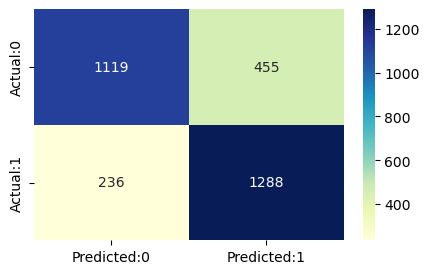

Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1574
           1       0.74      0.85      0.79      1524

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [52]:
KNN_tun=develop_prediction_report("KNN Tuning",Y_test, Y_pred)

## Support Vector Machine

In [53]:
# SVC

from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1,gamma=0.1)
svc_model.fit(X_train, Y_train)

Y_pred=svc_model.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 0 0]


Accuracy of the Training model:  1.0
Accuracy of the Testing model:  0.9309231762427372
[[1574    0]
 [ 214 1310]]


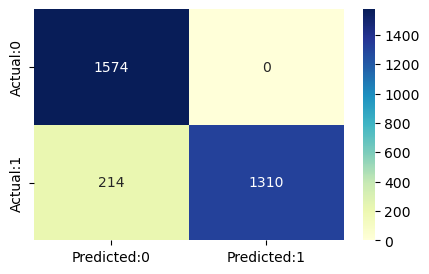

Classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1574
           1       1.00      0.86      0.92      1524

    accuracy                           0.93      3098
   macro avg       0.94      0.93      0.93      3098
weighted avg       0.94      0.93      0.93      3098



In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

train_acc=accuracy_score(Y_train, svc_model.predict(X_train))
print("Accuracy of the Training model: ",train_acc)

test_acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the Testing model: ",test_acc)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [55]:
SVM_result=develop_prediction_report("SVM",Y_test, Y_pred)

## Logistic Regression

In [56]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fiitng training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 0 0]


Accuracy of the Training model:  0.758301051466519
Accuracy of the Testing model:  0.7617817947062621
[[1198  376]
 [ 362 1162]]


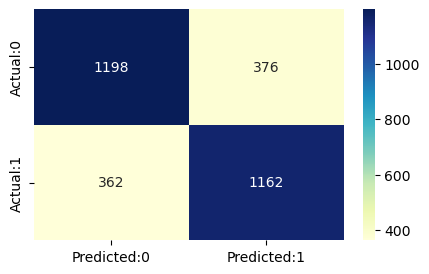

Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1574
           1       0.76      0.76      0.76      1524

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

train_acc=accuracy_score(Y_train, classifier.predict(X_train))
print("Accuracy of the Training model: ",train_acc)

test_acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the Testing model: ",test_acc)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [58]:
Logistic_result=develop_prediction_report("Logistic Regression",Y_test, Y_pred)

## Decision Tree

In [59]:
# Decision Tree

# predicting using the Decisin_tree_Classifier

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",
                                          random_state=10,
                                          splitter="best",
                                          min_samples_leaf=2, 
                                          min_samples_split=5, 
                                          max_depth=10 )

# splitter='best',min_samples_leaf=2,min_samples_split=5,max_depth=10 --->(first run code without this) 
# this is for Pruning the model

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 1 0]


Accuracy of the Training model:  0.8825401217487548
Accuracy of the Testing model:  0.8108457069076824
[[1158  416]
 [ 170 1354]]


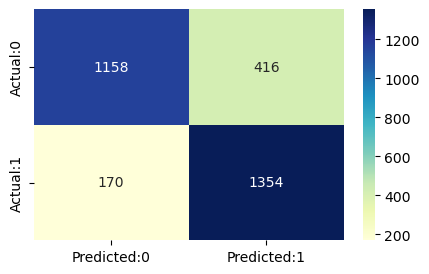

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1574
           1       0.76      0.89      0.82      1524

    accuracy                           0.81      3098
   macro avg       0.82      0.81      0.81      3098
weighted avg       0.82      0.81      0.81      3098



In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

train_acc=accuracy_score(Y_train, model_DecisionTree.predict(X_train))
print("Accuracy of the Training model: ",train_acc)

test_acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the Testing model: ",test_acc)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [61]:
DT_result=develop_prediction_report("Decision Tree",Y_test, Y_pred)

## Random forest classifier

In [62]:
# Predicting Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,
                                          random_state=10, bootstrap=True)
# this is for Pruning the model

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 0 0]


Accuracy of the Training model:  1.0
Accuracy of the Testing model:  0.8967075532601678
[[1335  239]
 [  81 1443]]


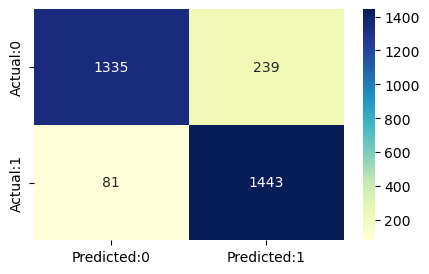

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1574
           1       0.86      0.95      0.90      1524

    accuracy                           0.90      3098
   macro avg       0.90      0.90      0.90      3098
weighted avg       0.90      0.90      0.90      3098



In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

train_acc=accuracy_score(Y_train, model_RandomForest.predict(X_train))
print("Accuracy of the Training model: ",train_acc)

test_acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the Testing model: ",test_acc)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cfm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# set sizeof the plot
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
plt.show()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

In [64]:
RF_result=develop_prediction_report("Random Forest",Y_test, Y_pred)

In [65]:
# Table Representation of All The Algorithms for Better Understanding and Explanation
modeling_performance = pd.concat([KNN_result,KNN_tun,SVM_result,Logistic_result,DT_result,RF_result])
modeling_performance

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,KNN,0.726967,0.709318,0.725952,0.718034
0,KNN Tuning,0.738956,0.845144,0.776953,0.788491
0,SVM,1.000000,0.859580,0.930923,0.924488
0,Logistic Regression,0.755527,0.762467,0.761782,0.758981
0,Decision Tree,0.764972,0.888451,0.810846,0.822101
0,Random Forest,0.857907,0.946850,0.896708,0.900187


## Results:
* The accuracy of KNN is: **72.59 %**

* The accuracy of KNN Tuning is : **77.69 %**

* The accuracy of SVM is: **93.09 %**

* The accuracy of Logistic Regression is: **76.17 %**

* The accuracy of Decision Tree is: **81.08 %**

* The accuracy of Random Forest Classifier is: **89.67 %**

* We can see here Accuracy of SVM is **93.09 %**. Its higher than other models.

## Testing Model

In [66]:
#testing model

a= np.array(Y_test)
predicted = np.array(svc_model.predict(X_test))
df_com=pd.DataFrame({"Original":a, "Predicted": predicted}, index= range(len(a)))
df_com.head(50)

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,0
9,1,1


In [67]:
#download model in excel

df_com.to_excel('output.xlsx', index=False)


# Conclusion

Telecom Industry typically have much more data available that could be included in the analysis, like extended customer and transaction data and operational data around network services provided. Also they typically have much larger amounts of churn/non-churn events at their disposal than the ca. 7000 in this case example. A high accuracy is needed to be able to identify promising customer cases where churn can be avoided as, eventually, the customer returns protected need to outweigh the costs of related retention campaigns.

The variables that are affecting are Contract Duration:- Contract duration month-to-month is the second biggest driver of churn
Tenure:- High tenure ranks as the strongest factor for not churning and the strongest feature overall